In [13]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
# Load your dataset
df = pd.read_csv('Mall_Customers.csv')


In [6]:
# Select features for clustering
features = df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']]


In [7]:
# Standardize the data
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

In [8]:
# Determine the optimal number of clusters using the elbow method
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(scaled_features)
    wcss.append(kmeans.inertia_)


C:\Users\Hp\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


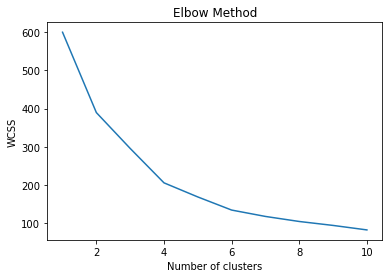

In [9]:
# Plot the elbow method
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')  # Within-Cluster Sum of Squares
plt.show()

In [10]:
# Based on the elbow method, choose the optimal number of clusters
optimal_clusters = 3 

In [11]:
# Apply k-means clustering
kmeans = KMeans(n_clusters=optimal_clusters, init='k-means++', max_iter=300, n_init=10, random_state=0)
df['Cluster'] = kmeans.fit_predict(scaled_features)


In [12]:
# Display the clustered data
print(df)

     CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)  \
0             1    Male   19                  15                      39   
1             2    Male   21                  15                      81   
2             3  Female   20                  16                       6   
3             4  Female   23                  16                      77   
4             5  Female   31                  17                      40   
..          ...     ...  ...                 ...                     ...   
195         196  Female   35                 120                      79   
196         197  Female   45                 126                      28   
197         198    Male   32                 126                      74   
198         199    Male   32                 137                      18   
199         200    Male   30                 137                      83   

     Cluster  
0          2  
1          2  
2          2  
3          2  
4          2

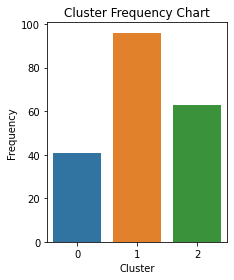

In [14]:
# Frequency Chart
plt.subplot(1, 2, 2)
sns.countplot(x='Cluster', data=df)
plt.title('Cluster Frequency Chart')
plt.xlabel('Cluster')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


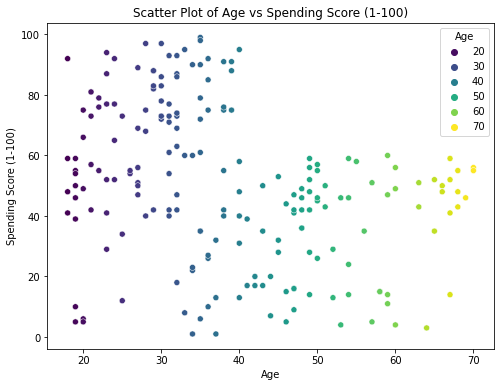

In [18]:
# Scatter Plot
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Age', y='Spending Score (1-100)', hue='Age', data=df, palette='viridis')
plt.title('Scatter Plot of Age vs Spending Score (1-100)')
plt.xlabel('Age')
plt.ylabel('Spending Score (1-100)')
plt.show()